<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Car_Acceptability_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Importing the data
df = pd.read_csv('/content/car.csv')
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#SUMMARIZING THE DATASET
print(df.shape)

(1728, 7)


In [4]:
#PRE-PROCESSING THE DATASET
df.isnull().sum()

,0
Buying_Price,0
Maintenance_Price,0
No_of_Doors,0
Person_Capacity,0
Size_of_Luggage,0
Safety,0
Car_Acceptability,0


In [5]:
print(df.columns)

Index(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety', 'Car_Acceptability'],
      dtype='object')


In [7]:
#Seperating the input and output data
X = df.drop('Car_Acceptability', axis=1)
y = df['Car_Acceptability']

In [8]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [13]:
# Create pipeline with scaler and logistic regression
pipeline = Pipeline([
    ('scaler', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', OneHotEncoder(handle_unknown='ignore')),
                ('classifier', LogisticRegression(max_iter=1000))])

In [19]:
# Taking the predictions from the model
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [20]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
Precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", Precision)
Recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", Recall)
F1_Score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", F1_Score)

Accuracy: 0.9161849710982659
Precision: 0.9167412188230278
Recall: 0.9161849710982659
F1 Score: 0.9163492557430511


In [21]:
# Model Evaluation
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)
Precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", Precision)
Recall = recall_score(y_train, y_train_pred, average='weighted')
print("Recall:", Recall)
F1_Score = f1_score(y_train, y_train_pred, average='weighted')
print("F1 Score:", F1_Score)

Accuracy: 0.9232995658465991
Precision: 0.9242188493820933
Recall: 0.9232995658465991
F1 Score: 0.9219037082605882


In [25]:
# Detailed report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.84      0.82      0.83        83
        good       0.50      0.55      0.52        11
       unacc       0.96      0.97      0.97       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.92       346
   macro avg       0.81      0.80      0.81       346
weighted avg       0.92      0.92      0.92       346



Text(0.5, 1.0, 'Confusion Matrix')

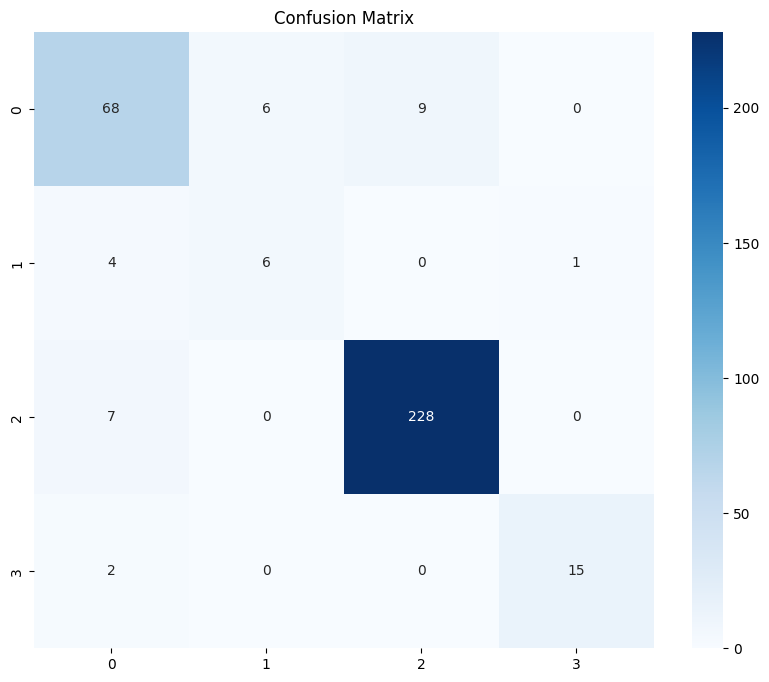

In [27]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')